# NLP Course 2 Week 1 Lesson : Building The Model - Lecture Exercise 01

# Vocabulary Creation 
Create a tiny vocabulary from a tiny corpus

### Imports and Data

In [2]:
import re                         # regular expression library; for tokenization of words
from collections import Counter   # collections library; counter: dict subclass for counting hashable objects
import matplotlib.pyplot as plt   # for data visualization

In [3]:
# the tiny corpus of text ! 
text = 'red pink pink blue blue yellow ORANGE BLUE BLUE PINK' # 🌈
print(text)
print('string length : ',len(text))

red pink pink blue blue yellow ORANGE BLUE BLUE PINK
string length :  52


### Preprocessing

In [5]:
# convert all letters to lower case
text_lowercase = text.lower()
print(text_lowercase)
print('string length : ',len(text_lowercase))

red pink pink blue blue yellow orange blue blue pink
string length :  52


In [6]:
# some regex to tokenize the string to words and return them in a list
words = re.findall(r'\w+', text_lowercase)
print(words)
print('count : ',len(words))

['red', 'pink', 'pink', 'blue', 'blue', 'yellow', 'orange', 'blue', 'blue', 'pink']
count :  10


### Create Vocabulary
Option 1 : A set of distinct words from the text

In [8]:
# create vocab
vocab = set(words)
print(vocab)
print('count : ',len(vocab))

{'pink', 'yellow', 'blue', 'red', 'orange'}
count :  5


### Add Information with Word Counts
Option 2 : Two alternatives for including the word count as well

In [10]:
# Create vocab including word count

counts_a = dict()  # Initialize an empty dictionary to store word counts

for w in words:    # Iterate over each word in the list 'words'
    
    counts_a[w] = counts_a.get(w, 0) + 1   # Increment the count for the word 'w' in 'counts_a'.
                                           # If 'w' is not in 'counts_a', start with 0 and add 1.
 
print(counts_a)
print('count : ',len(counts_a))

{'red': 1, 'pink': 3, 'blue': 4, 'yellow': 1, 'orange': 1}
count :  5


In [11]:
# Create vocab including word count using collections.Counter

counts_b = dict()  # Initialize an empty dictionary to store word counts

counts_b = Counter(words)  # Use the Counter class from the collections module to count the occurrences 
                           # of each word in the list 'words', and store the result in 'counts_b'.
                           # 'Counter' automatically creates a dictionary where keys are words and 
                           # values are their counts.

print(counts_b)
print('count : ',len(counts_b))

Counter({'blue': 4, 'pink': 3, 'red': 1, 'yellow': 1, 'orange': 1})
count :  5


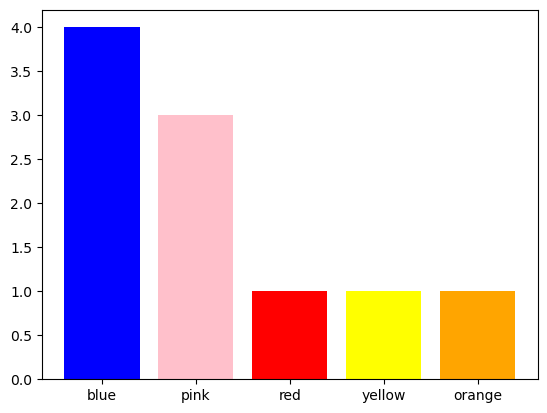

In [12]:
# Barchart of sorted word counts

d = {'blue': counts_b['blue'],       # Create a dictionary 'd' with specific colors as keys
     'pink': counts_b['pink'],       # and their corresponding word counts from 'counts_b' as values.
     'red': counts_b['red'], 
     'yellow': counts_b['yellow'], 
     'orange': counts_b['orange']}

plt.bar(range(len(d)),               # Create a bar chart with bars positioned at indices 0 to len(d)-1.
        list(d.values()),            # Set the heights of the bars to the values (word counts) in 'd'.
        align='center',              # Center the bars on the tick marks.
        color=d.keys())              # Color each bar according to the corresponding key (color name) in 'd'.

_ = plt.xticks(range(len(d)),        # Set the x-axis tick marks at positions 0 to len(d)-1.
               list(d.keys()))       # Label the x-axis ticks with the color names from 'd'.

### Ungraded Exercise
Note that `counts_b`, above, returned by `collections.Counter` is sorted by word count

Can you modify the tiny corpus of ***text*** so that a new color appears 
between ***pink*** and ***red*** in `counts_b` ?

Do you need to run all the cells again, or just specific ones ? 

In [14]:
# New corpus of text ! 
text2 = 'red pink pink blue blue yellow ORANGE BLUE BLUE PINK green GrEeN'

# convert all letters to lower case
text_lowercase2 = text2.lower()

# some regex to tokenize the string to words and return them in a list
words2 = re.findall(r'\w+', text_lowercase2)

# Create vocab including word count using collections.Counter
counts_b = dict()
counts_b = Counter(words2) 

In [15]:
print('counts_b : ', counts_b)
print('count : ', len(counts_b))

counts_b :  Counter({'blue': 4, 'pink': 3, 'green': 2, 'red': 1, 'yellow': 1, 'orange': 1})
count :  6


Expected Outcome:

counts_b : Counter({'blue': 4, 'pink': 3, **'your_new_color_here': 2**, red': 1, 'yellow': 1, 'orange': 1})
<br>
count :  6

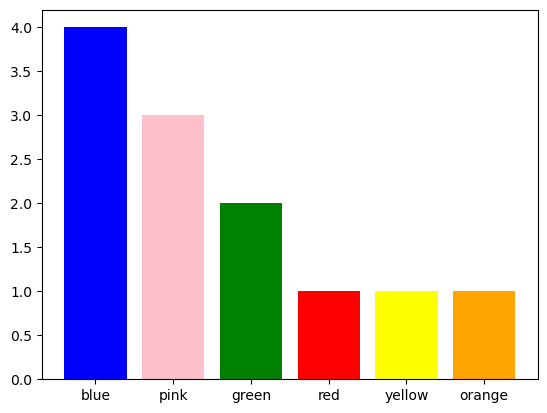

In [17]:
# Barchart of sorted word counts

d = {'blue': counts_b['blue'],       # Create a dictionary 'd' with specific colors as keys
     'pink': counts_b['pink'],       # and their corresponding word counts from 'counts_b' as values.
     'green': counts_b['green'], 
     'red': counts_b['red'], 
     'yellow': counts_b['yellow'], 
     'orange': counts_b['orange']}

plt.bar(range(len(d)),               # Create a bar chart with bars positioned at indices 0 to len(d)-1.
        list(d.values()),            # Set the heights of the bars to the values (word counts) in 'd'.
        align='center',              # Center the bars on the tick marks.
        color=d.keys())              # Color each bar according to the corresponding key (color name) in 'd'.

_ = plt.xticks(range(len(d)),        # Set the x-axis tick marks at positions 0 to len(d)-1.
               list(d.keys()))       # Label the x-axis ticks with the color names from 'd'.

### Summary

This is a tiny example but the methodology scales very well.
<br>
In the assignment you will create a large vocabulary of thousands of words, from a corpus
<br>
of tens of thousands or words! But the mechanics are exactly the same. 
<br> 
The only extra things to pay attention to should be; run time, memory management and the vocab data structure.
<br> 
So the choice of approach used in code blocks `counts_a` vs `counts_b`, above, will be important.